### 내 풀이

In [64]:
def solution(bridge_length, weight, truck_weights):
    """
    모든 트럭이 다리를 건너려면 최소 몇초가 걸리는가?
    최대 올라갈 수 있는 트럭 갯수: bridge_length
    최대 다리의 하중 : weight
    
    트럭 2대, 무게 10까지 가능한 다리.
    트럭 무게 = [7,4,5,6] 이 주어짐.
    주어지는 무게 list의 크기가 10000임. 효율성 문제는 아니다.
    
    문제 예시 설명 그대로 코드로 옮기면 어떨까 싶음.
    
    """
    
    
    def sum_of_weights_on_bridge(queue):
        return sum([i for i,_ in queue])
    
    
    #1. 주어진 트럭 웨이트를 큐로 구성
    from collections import deque
    truck_queue = deque(truck_weights)
    bridge_queue = deque()
    print(f"대기 트럭 : {truck_queue}")
    
    time = 0
    
    while True:
        
        ## loop가 한번 돌때마다 어떤 조건이던 상관없이 time을 먼저 증가시킴
        time += 1
        print(f"해당 time 이 지났을때의 상태를 출력하라! : {time}s")
            
        #2. 대기열 젤 앞의 트럭을 peek
        ## 2.1 대기열에 하나도 트럭이 안남아 있는 경우 (전부 브릿지 위에 올라갔거나 상황이 종료됐거나)
        if len(truck_queue) != 0: 
            curr = truck_queue[0]
            print(f"peek된 트럭 : {curr}")
            
        else:
            curr = weight + 1 # 최대치 설정
            print(f"truck이 전부 브릿지 위에 있습니다.")
        
        
        #3. 다리가 비었을 경우 무조건 트럭을 올림
        ## bridge queue의 구성 : [(weight, time), (weight, time)]
        ### 해당 time 벨류를 bridge_length으로 나누었을 때 나머지가 0이면 제거되어야함.
        
        if len(bridge_queue) == 0:
            bridge_queue.append((curr, 1))
            truck_queue.popleft()
        
        
        #4. 다리가 비지 않았을 경우, weight및 len 최대치를 고려해서 결정해야함.
        else:
            #4.1 다리 위에 올라가있는 트럭의 갯수가 length보다 작고, 올라가 있는 트럭의 weight총합 + poped 해서 총 weight 이하일때
            if (len(bridge_queue) < bridge_length) & (sum_of_weights_on_bridge(bridge_queue) + curr <= weight):
                
                ## 원래 bridge 위에 있는놈들 time을 하나 증가시킴.
                bridge_queue = deque(map(lambda x: (x[0], x[1]+1), bridge_queue))
                
                ## 브릿지 큐에 curr 추가
                bridge_queue.append((curr, 1))
                truck_queue.popleft()
            
            #4.2 다리에 올라갈 수 있는 상태가 아닌 경우, 대기. 큐에서 뽑아내지 않음. 다리 위에 있는 넘은 time을 증가시켜야함.
            else:
                
                ## 원래 bridge 위에 있는놈들 time을 하나 증가시킴.
                bridge_queue = deque(map(lambda x: (x[0], x[1]+1), bridge_queue))
                
        
        print(f"다리를 건너는 트럭 : {bridge_queue}")
        print(f"대기 트럭 : {truck_queue}")
        
        #5. 해당 time에서의 연산 종료. 후처리로 bridge_queue의 상태를 확인하여 다건넌 애를 제거한다.
        ## 원리 상 동시에 둘이 제거될 순 없다. 브릿지 큐에 제일 먼저 들어온 트럭만 해당 제거의 후보가 된다.
        _truck = bridge_queue[0]
        if _truck[1] % bridge_length == 0:
            bridge_queue.popleft()
            print(f"{_truck}은 {time}s 가 지난 시점에 다 건넜으므로 다리 큐에서 제거되었다.")
        
        
        #6. 종료 조건 : 트럭 큐랑 브릿지 큐에 아무것도 없으면 끝
        if (len(truck_queue) == 0) & (len(bridge_queue) == 0):
            break   
    
    answer = time + 1 # 모든 트럭이 지나가는데 기다려야 하기 때문에 + 1 해줌
    return answer

In [63]:
bridge_length = 2
weight = 10
truck_weights = [7,4,5,6]

solution(bridge_length, weight, truck_weights)

대기 트럭 : deque([7, 4, 5, 6])
해당 time 이 지났을때의 상태를 출력하라! : 1s
peek된 트럭 : 7
다리를 건너는 트럭 : deque([(7, 1)])
대기 트럭 : deque([4, 5, 6])
해당 time 이 지났을때의 상태를 출력하라! : 2s
peek된 트럭 : 4
다리를 건너는 트럭 : deque([(7, 2)])
대기 트럭 : deque([4, 5, 6])
(7, 2)은 2s 가 지난 시점에 다 건넜으므로 다리 큐에서 제거되었다.
해당 time 이 지났을때의 상태를 출력하라! : 3s
peek된 트럭 : 4
다리를 건너는 트럭 : deque([(4, 1)])
대기 트럭 : deque([5, 6])
해당 time 이 지났을때의 상태를 출력하라! : 4s
peek된 트럭 : 5
다리를 건너는 트럭 : deque([(4, 2), (5, 1)])
대기 트럭 : deque([6])
(4, 2)은 4s 가 지난 시점에 다 건넜으므로 다리 큐에서 제거되었다.
해당 time 이 지났을때의 상태를 출력하라! : 5s
peek된 트럭 : 6
다리를 건너는 트럭 : deque([(5, 2)])
대기 트럭 : deque([6])
(5, 2)은 5s 가 지난 시점에 다 건넜으므로 다리 큐에서 제거되었다.
해당 time 이 지났을때의 상태를 출력하라! : 6s
peek된 트럭 : 6
다리를 건너는 트럭 : deque([(6, 1)])
대기 트럭 : deque([])
해당 time 이 지났을때의 상태를 출력하라! : 7s
truck이 전부 브릿지 위에 있습니다.
다리를 건너는 트럭 : deque([(6, 2)])
대기 트럭 : deque([])
(6, 2)은 7s 가 지난 시점에 다 건넜으므로 다리 큐에서 제거되었다.


8

In [66]:
bridge_length = 100
weight = 100
truck_weights = [10,10,10,10,10,10,10,10,10,10]

solution(bridge_length, weight, truck_weights)

대기 트럭 : deque([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 1s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 1)])
대기 트럭 : deque([10, 10, 10, 10, 10, 10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 2s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 2), (10, 1)])
대기 트럭 : deque([10, 10, 10, 10, 10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 3s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 3), (10, 2), (10, 1)])
대기 트럭 : deque([10, 10, 10, 10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 4s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 4), (10, 3), (10, 2), (10, 1)])
대기 트럭 : deque([10, 10, 10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 5s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 5), (10, 4), (10, 3), (10, 2), (10, 1)])
대기 트럭 : deque([10, 10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 6s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 6), (10, 5), (10, 4), (10, 3), (10, 2), (10, 1)])
대기 트럭 : deque([10, 10, 10, 10])
해당 time 이 지났을때의 상태를 출력하라! : 7s
peek된 트럭 : 10
다리를 건너는 트럭 : deque([(10, 7), (10, 6), (10, 5), (10, 4), (10, 3

110

### 제출물

쉣 한번에 통과되긴 했는데 코드가 더러워...
매우 오래 걸린 테스트도 눈에 보인다

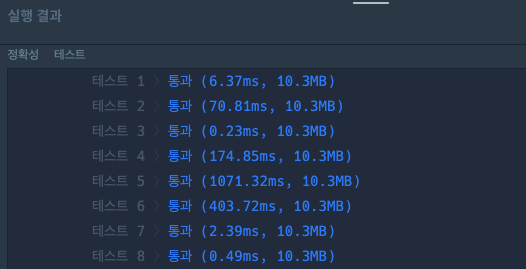

In [67]:
def solution(bridge_length, weight, truck_weights):
     
    def sum_of_weights_on_bridge(queue):
        return sum([i for i,_ in queue])
    
    
    #1. 주어진 트럭 웨이트를 큐로 구성
    from collections import deque
    truck_queue = deque(truck_weights)
    bridge_queue = deque()
    
    time = 0 
    while True:
        
        ## loop가 한번 돌때마다 어떤 조건이던 상관없이 time을 먼저 증가시킴
        time += 1
            
        #2. 대기열 젤 앞의 트럭을 peek
        ## 2.1 대기열에 하나도 트럭이 안남아 있는 경우 (전부 브릿지 위에 올라갔거나 상황이 종료됐거나)
        if len(truck_queue) != 0: 
            curr = truck_queue[0]
        else:
            curr = weight + 1 # 최대치 설정

        #3. 다리가 비었을 경우 무조건 트럭을 올림
        ## bridge queue의 구성 : [(weight, time), (weight, time)]
        ### 해당 time 벨류를 bridge_length으로 나누었을 때 나머지가 0이면 제거되어야함.
        
        if len(bridge_queue) == 0:
            bridge_queue.append((curr, 1))
            truck_queue.popleft()
        
        #4. 다리가 비지 않았을 경우, weight및 len 최대치를 고려해서 결정해야함.
        else:
            #4.1 다리 위에 올라가있는 트럭의 갯수가 length보다 작고, 올라가 있는 트럭의 weight총합 + poped 해서 총 weight 이하일때
            if (len(bridge_queue) < bridge_length) & (sum_of_weights_on_bridge(bridge_queue) + curr <= weight):
                
                ## 원래 bridge 위에 있는놈들 time을 하나 증가시킴.
                bridge_queue = deque(map(lambda x: (x[0], x[1]+1), bridge_queue))
                
                ## 브릿지 큐에 curr 추가
                bridge_queue.append((curr, 1))
                truck_queue.popleft()
            
            #4.2 다리에 올라갈 수 있는 상태가 아닌 경우, 대기. 큐에서 뽑아내지 않음. 다리 위에 있는 넘은 time을 증가시켜야함.
            else:
                
                ## 원래 bridge 위에 있는놈들 time을 하나 증가시킴.
                bridge_queue = deque(map(lambda x: (x[0], x[1]+1), bridge_queue))
                
        
        #5. 해당 time에서의 연산 종료. 후처리로 bridge_queue의 상태를 확인하여 다건넌 애를 제거한다.
        ## 원리 상 동시에 둘이 제거될 순 없다. 브릿지 큐에 제일 먼저 들어온 트럭만 해당 제거의 후보가 된다.
        _truck = bridge_queue[0]
        if _truck[1] % bridge_length == 0:
            bridge_queue.popleft()

        #6. 종료 조건 : 트럭 큐랑 브릿지 큐에 아무것도 없으면 끝
        if (len(truck_queue) == 0) & (len(bridge_queue) == 0):
            break   
    
    answer = time + 1 # 모든 트럭이 지나가는데 기다려야 하기 때문에 + 1 해줌
    return answer

In [68]:
bridge_length = 100
weight = 100
truck_weights = [10,10,10,10,10,10,10,10,10,10]

solution(bridge_length, weight, truck_weights)

110

### 다른 사람 풀이
- 클래스를 사용해서 깔끔하게 풀어낸게 눈에 보여서 한번 따라 해 보았다.

In [ ]:
# 아직 따라 안했다...